In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import joblib
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import log_loss
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#read the csv dataset
data = pd.read_csv("/content/driverresponse (1).csv")
df = pd.read_csv('/content/accident.csv')
data.columns
data.head()

,index,sno,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,...,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
0,0,1,Andhra Pradesh,south,2,594,12747.0,507,328,668,...,154,1938,128,17286,40,667,325,1024,306,2868
1,1,2,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,...,0,22,15,45,0,7,11,8,8,18
2,2,3,Assam,northeast,5,613,4596.0,129,104,156,...,3,628,352,3520,64,334,156,371,3,873
3,3,4,Bihar,north,1,1680,1496.0,278,236,308,...,72,439,593,2323,8,458,156,573,122,612
4,4,5,Chhattisgarh,centre,9,335,6720.0,188,313,266,...,81,520,145,6660,62,410,175,467,144,953


In [ ]:
data.tail()

,index,sno,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,...,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
31,31,32,D & N Haveli,west,4,1,21.0,0,0,0,...,0,65,0,8,0,5,0,5,2,4
32,32,33,Daman & Diu,west,4,0,21.0,2,2,1,...,0,10,7,29,0,2,0,2,1,27
33,33,34,Delhi,north,1,51,NaN,0,0,0,...,0,0,164,1696,229,131,129,211,0,2838
34,34,35,Lakshadweep,southwest,8,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,35,36,Puducherry,south,2,73,250.0,136,0,8,...,15,417,82,1297,9,90,0,71,0,193


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            36 non-null     int64  
 1   sno              36 non-null     int64  
 2   stateut          36 non-null     object 
 3   region           36 non-null     object 
 4   regionid         36 non-null     int64  
 5   alcintake2014    36 non-null     int64  
 6   overspeed2014    35 non-null     float64
 7   overtaking2014   36 non-null     int64  
 8   lanejumping2014  36 non-null     int64  
 9   wrongside2014    36 non-null     int64  
 10  signalavoid2014  36 non-null     int64  
 11  asleep2014       36 non-null     int64  
 12  othercause2014   36 non-null     int64  
 13  alcintake2016    36 non-null     int64  
 14  overspeed2016    36 non-null     int64  
 15  signalavoid2016  36 non-null     int64  
 16  wrongside2016    36 non-null     int64  
 17  lanejumping2016  3

In [ ]:
data.shape

(36, 21)

In [ ]:
data['regionid'].value_counts()

1    9
5    6
2    5
9    5
4    5
3    3
6    1
7    1
8    1
Name: regionid, dtype: int64

In [ ]:
data.describe()

,index,sno,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
count,36.000000,36.000000,36.000000,36.000000,35.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,17.500000,18.500000,4.000000,525.444444,5950.600000,312.833333,283.361111,302.000000,37.000000,92.027778,1007.944444,413.722222,7453.916667,124.750000,490.388889,236.472222,823.527778,126.444444,1403.611111
std,10.535654,10.535654,2.746426,767.133866,8677.731983,514.513279,462.370115,389.184642,81.196411,234.019472,1780.826436,907.754202,11689.392631,225.198246,754.259534,454.375457,1477.494162,248.883501,1927.404966
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.750000,9.750000,1.750000,11.750000,72.500000,1.500000,0.000000,6.250000,0.000000,0.000000,19.000000,24.000000,140.500000,0.000000,16.500000,0.000000,16.500000,0.000000,24.750000
50%,17.500000,18.500000,4.000000,82.500000,2561.000000,75.500000,86.500000,113.000000,4.500000,5.000000,156.000000,105.000000,2009.500000,9.500000,118.000000,65.500000,175.000000,7.500000,555.000000
75%,26.250000,27.250000,5.000000,706.500000,6493.000000,350.000000,316.750000,531.750000,34.500000,133.000000,810.000000,412.500000,10966.500000,117.750000,683.500000,199.750000,1020.250000,127.500000,1753.500000
max,35.000000,36.000000,9.000000,3540.000000,29790.000000,2171.000000,1869.000000,1529.000000,451.000000,1393.000000,6874.000000,4633.000000,47055.000000,1004.000000,3209.000000,2367.000000,7155.000000,1121.000000,6915.000000


In [ ]:
data.isnull().sum()

index              0
sno                0
stateut            0
region             0
regionid           0
alcintake2014      0
overspeed2014      1
overtaking2014     0
lanejumping2014    0
wrongside2014      0
signalavoid2014    0
asleep2014         0
othercause2014     0
alcintake2016      0
overspeed2016      0
signalavoid2016    0
wrongside2016      0
lanejumping2016    0
overtaking2016     0
asleep2016         0
othercause2016     0
dtype: int64

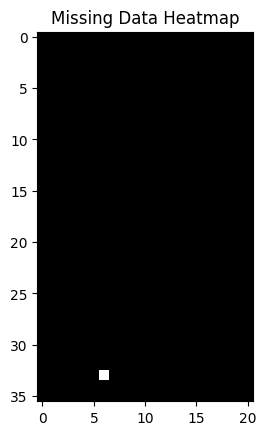

In [ ]:
# Create a heatmap
import matplotlib.pyplot as plt
missing_values_array = np.where(data.isnull(), 1, 0)
plt.imshow(missing_values_array, cmap='gray', interpolation='nearest')
plt.title('Missing Data Heatmap')
plt.show()

<Axes: title={'center': 'Finding Null Values Using Heatmap\n'}>

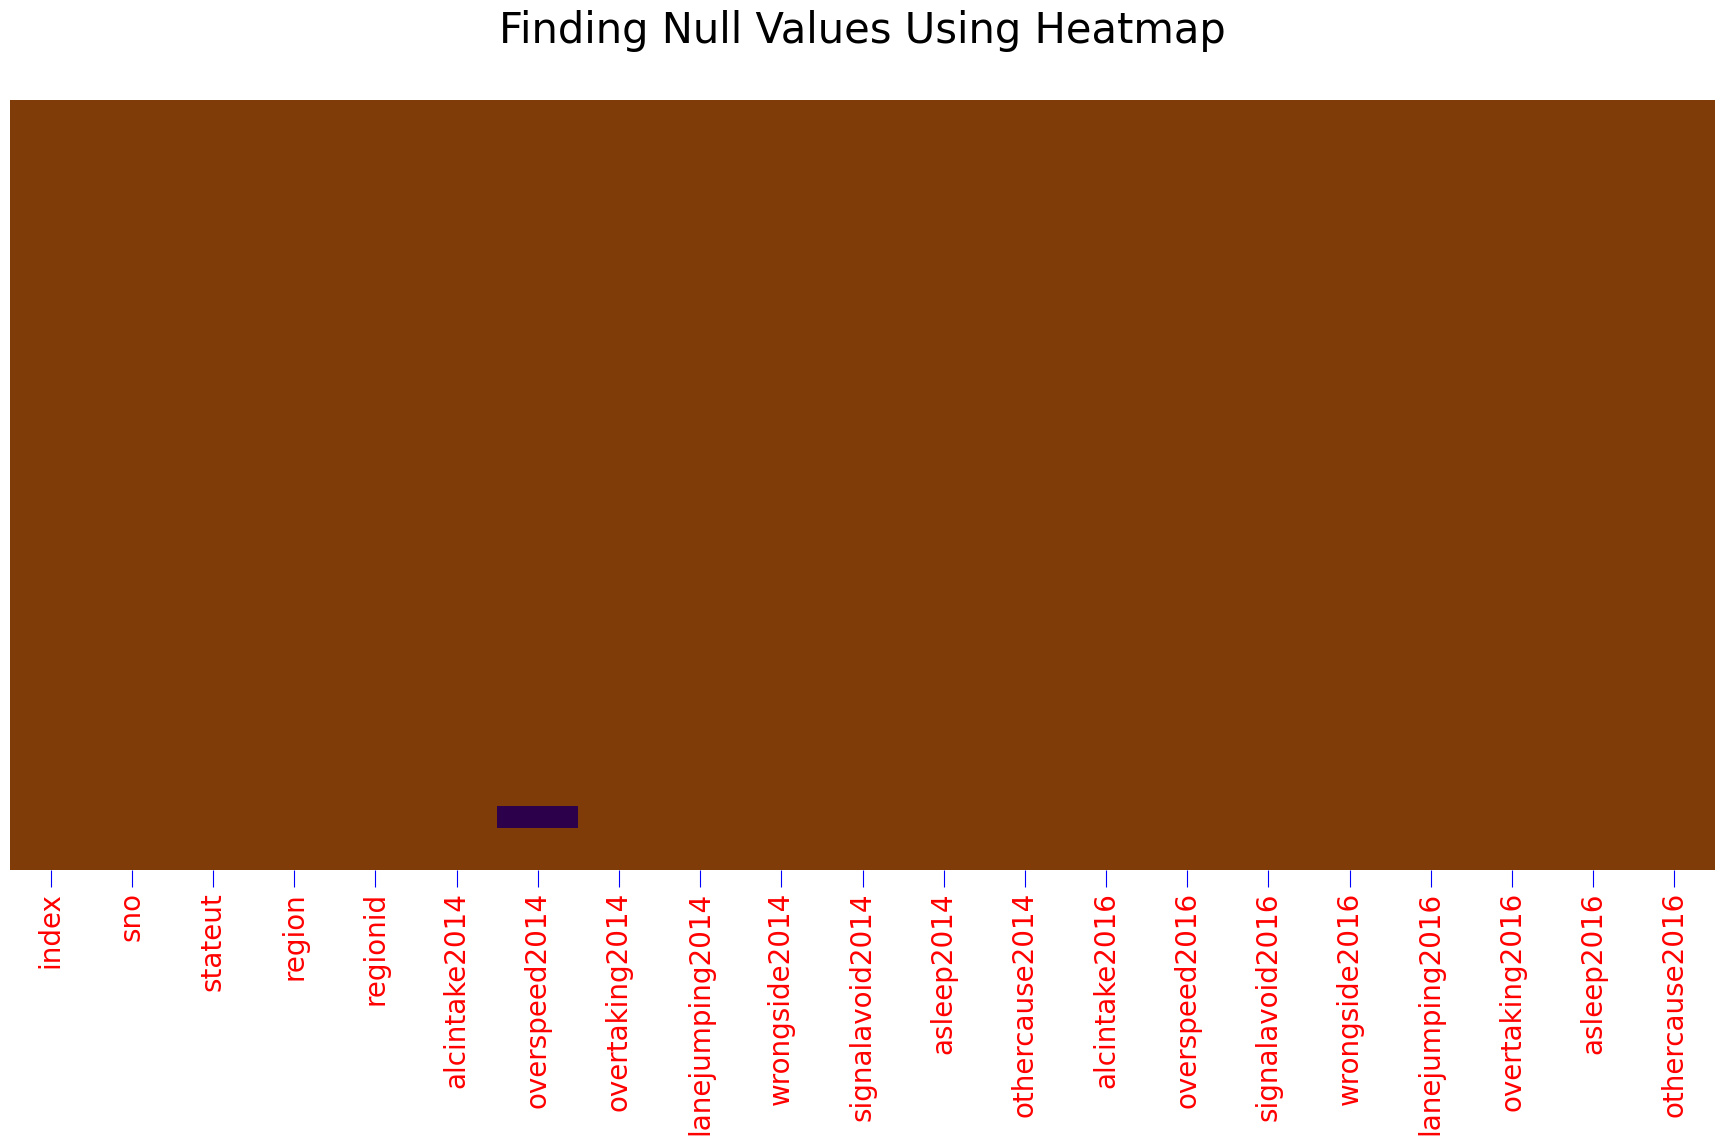

In [ ]:
#visualizing Null values if it exists
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='red')
plt.tick_params(size=12,color='blue')
plt.title('Finding Null Values Using Heatmap\n',color='black',size=30)
sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuOr',
            )

In [ ]:
data["overspeed2014"] = data["overspeed2014"].fillna(data["overspeed2014"].mean())

data[['overspeed2014']].tail(3)

,overspeed2014
33,5950.6
34,1.0
35,250.0


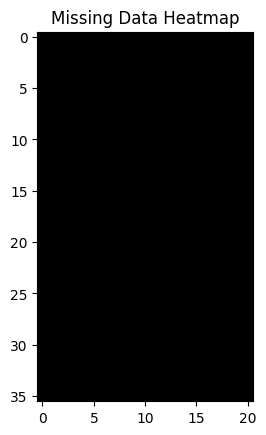

In [ ]:
# Create a heatmap
import matplotlib.pyplot as plt
missing_values_array = np.where(data.isnull(), 1, 0)
plt.imshow(missing_values_array, cmap='gray', interpolation='nearest')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
data = data.drop(["index"], axis=1)
data.head().T

,0,1,2,3,4
sno,1,2,3,4,5
stateut,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh
region,south,northeast,northeast,north,centre
regionid,2,5,5,1,9
alcintake2014,594,11,613,1680,335
overspeed2014,12747.0,16.0,4596.0,1496.0,6720.0
overtaking2014,507,0,129,278,188
lanejumping2014,328,0,104,236,313
wrongside2014,668,0,156,308,266
signalavoid2014,29,0,7,7,10


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sno              36 non-null     int64  
 1   stateut          36 non-null     object 
 2   region           36 non-null     object 
 3   regionid         36 non-null     int64  
 4   alcintake2014    36 non-null     int64  
 5   overspeed2014    36 non-null     float64
 6   overtaking2014   36 non-null     int64  
 7   lanejumping2014  36 non-null     int64  
 8   wrongside2014    36 non-null     int64  
 9   signalavoid2014  36 non-null     int64  
 10  asleep2014       36 non-null     int64  
 11  othercause2014   36 non-null     int64  
 12  alcintake2016    36 non-null     int64  
 13  overspeed2016    36 non-null     int64  
 14  signalavoid2016  36 non-null     int64  
 15  wrongside2016    36 non-null     int64  
 16  lanejumping2016  36 non-null     int64  
 17  overtaking2016   3

In [ ]:
data['region'].nunique()

9

In [ ]:
data = data.replace({"Arunachal Pradesh": "Arunanchal Pradesh", "Orissa": "Odisha",
                    "A & N Islands": "Andaman & Nicobar Island", "D & N Haveli": "Dadara & Nagar Havelli",
                     "Delhi": "NCT of Delhi"})
data.head().T

,0,1,2,3,4
sno,1,2,3,4,5
stateut,Andhra Pradesh,Arunanchal Pradesh,Assam,Bihar,Chhattisgarh
region,south,northeast,northeast,north,centre
regionid,2,5,5,1,9
alcintake2014,594,11,613,1680,335
overspeed2014,12747.0,16.0,4596.0,1496.0,6720.0
overtaking2014,507,0,129,278,188
lanejumping2014,328,0,104,236,313
wrongside2014,668,0,156,308,266
signalavoid2014,29,0,7,7,10


In [ ]:
alc_intake_region = pd.pivot_table(data,
              index = ["region"],
                      values=["alcintake2014","alcintake2016"],
                      aggfunc=np.sum)
alc_intake_region = alc_intake_region.sort_values(["alcintake2014"], ascending=False)
alc_intake_region['pct_change'] = ((alc_intake_region[["alcintake2014","alcintake2016"]].pct_change(axis=1)["alcintake2016"])*100).round(2)
alc_intake_region

,alcintake2014,alcintake2016,pct_change
region,,,
centre,6091,5228,-14.17
north,5481,6404,16.84
south,4325,1270,-70.64
west,1303,300,-76.98
northwest,915,673,-26.45
northeast,748,498,-33.42
east,28,494,1664.29
southeast,25,27,8.00
southwest,0,0,NaN


In [ ]:

overspeed_region = pd.pivot_table(data,
              index = ["region"],
                      values=["overspeed2014","overspeed2016"],
                      aggfunc=np.sum)
overspeed_region = overspeed_region.sort_values(["overspeed2014"], ascending=False)
overspeed_region["%change"] = ((overspeed_region[['overspeed2014', 'overspeed2016']].pct_change(axis=1)['overspeed2016'])*100).round(2)
overspeed_region

,overspeed2014,overspeed2016,%change
region,,,
south,85782.0,131206,52.95
west,46732.0,40877,-12.53
centre,39279.0,53928,37.29
north,22321.6,23124,3.59
northwest,11395.0,13358,17.23
northeast,4731.0,3824,-19.17
east,3886.0,1900,-51.11
southeast,94.0,124,31.91
southwest,1.0,0,-100.00


In [ ]:
overtake_region = pd.pivot_table(data,
              index = ["region"],
                      values=["overtaking2014","overtaking2016"],
                      aggfunc=np.sum)
overtake_region = overtake_region.sort_values(["overtaking2014"], ascending=False)
overtake_region["%change"] = ((overtake_region[["overtaking2014","overtaking2016"]].pct_change(axis=1)['overtaking2016'])*100).round(2)
overtake_region

,overtaking2014,overtaking2016,%change
region,,,
south,4975,11444,130.03
west,2363,2986,26.36
centre,2283,6446,182.35
north,1122,6785,504.72
east,281,184,-34.52
northeast,129,442,242.64
northwest,102,1345,1218.63
southeast,7,15,114.29
southwest,0,0,NaN


In [ ]:
lanejump_region = pd.pivot_table(data,
              index = ["region"],
                      values=["lanejumping2014","lanejumping2016"],
                      aggfunc=np.sum)
lanejump_region = lanejump_region.sort_values(["lanejumping2014"], ascending=False)
lanejump_region["%change"] = ((lanejump_region[["lanejumping2014","lanejumping2016"]].pct_change(axis=1)["lanejumping2016"])*100).round(2)
lanejump_region

,lanejumping2014,lanejumping2016,%change
region,,,
south,3830,3105,-18.93
centre,2506,1167,-53.43
west,1277,1427,11.75
northwest,1157,217,-81.24
north,1121,2377,112.04
east,186,53,-71.51
northeast,104,167,60.58
southeast,20,0,-100.00
southwest,0,0,NaN


In [ ]:
wrongside_region = pd.pivot_table(data,
              index = ["region"],
                      values=["wrongside2014","wrongside2016"],
                      aggfunc=np.sum)
wrongside_region = wrongside_region.sort_values(["wrongside2014"], ascending=False)
wrongside_region["%change"] = ((wrongside_region[["wrongside2014","wrongside2016"]].pct_change(axis=1)["wrongside2016"])*100).round(2)
wrongside_region

,wrongside2014,wrongside2016,%change
region,,,
south,4220,6120,45.02
centre,2508,2600,3.67
north,1808,4731,161.67
west,1252,2681,114.14
northwest,656,981,49.54
east,235,110,-53.19
northeast,182,400,119.78
southeast,11,31,181.82
southwest,0,0,NaN


In [ ]:
signal_region = pd.pivot_table(data,
              index = ["region"],
                      values=["signalavoid2014","signalavoid2016"],
                      aggfunc=np.sum)
signal_region = signal_region.sort_values(["signalavoid2014"], ascending=False)
signal_region["%change"] = ((signal_region[["signalavoid2014","signalavoid2016"]].pct_change(axis=1)["signalavoid2016"])*100).round(2)
signal_region


,signalavoid2014,signalavoid2016,%change
region,,,
south,683,1687,147.00
north,239,1651,590.79
centre,234,639,173.08
east,107,90,-15.89
west,60,358,496.67
northeast,7,64,814.29
northwest,2,0,-100.00
southeast,0,2,inf
southwest,0,0,NaN


In [ ]:
asleep_region = pd.pivot_table(data,
              index = ["region"],
                      values=["asleep2014","asleep2016"],
                      aggfunc=np.sum)
asleep_region = asleep_region.sort_values(["asleep2014"], ascending=False)
asleep_region["%change"] = ((asleep_region[["asleep2014","asleep2016"]].pct_change(axis=1)["asleep2016"])*100).round(2)
asleep_region

,asleep2014,asleep2016,%change
region,,,
south,1868,1078,-42.29
north,498,1722,245.78
centre,491,919,87.17
west,228,541,137.28
northwest,176,222,26.14
east,49,29,-40.82
northeast,3,41,1266.67
southeast,0,0,NaN
southwest,0,0,NaN


In [ ]:
others_region = pd.pivot_table(data,
              index = ["region"],
                      values=["othercause2014","othercause2016"],
                      aggfunc=np.sum)
others_region = others_region.sort_values(["othercause2014"], ascending=False)
others_region["%change"] = ((others_region[["othercause2014","othercause2016"]].pct_change(axis=1)["othercause2016"])*100).round(2)
others_region

,othercause2014,othercause2016,%change
region,,,
south,14015,12932,-7.73
centre,9066,8218,-9.35
west,6054,5065,-16.34
north,3193,11353,255.56
northwest,1803,5012,177.98
east,1384,6954,402.46
northeast,771,957,24.12
southeast,0,39,inf
southwest,0,0,NaN


In [ ]:
alcintake_state = pd.pivot_table(data,
              index = ["stateut"],
                      values=["alcintake2014","alcintake2016"],
                      aggfunc=np.sum)
alcintake_state = alcintake_state.sort_values(["alcintake2014"], ascending=False)
alcintake_state["%change"] = ((alcintake_state[["alcintake2014","alcintake2016"]].pct_change(axis=1)["alcintake2016"])*100).round(2)
alcintake_state

,alcintake2014,alcintake2016,%change
stateut,,,
Madhya Pradesh,3540,3083,-12.91
Karnataka,2207,396,-82.06
Bihar,1680,593,-64.70
Tamil Nadu,1416,531,-62.50
Maharashtra,1251,226,-81.93
Uttar Pradesh,1232,4633,276.06
Haryana,1095,529,-51.69
Telangana,968,202,-79.13
Rajasthan,915,673,-26.45


In [ ]:
overspeed_state = pd.pivot_table(data,
              index = ["stateut"],
                      values=["overspeed2014","overspeed2016"],
                      aggfunc=np.sum).sort_values(["overspeed2014"], ascending=False)
overspeed_state["%change"] = ((overspeed_state[["overspeed2014","overspeed2016"]].pct_change(axis=1)["overspeed2016"])*100).round(2)
overspeed_state

,overspeed2014,overspeed2016,%change
stateut,,,
Maharashtra,29790.0,23643,-20.63
Tamil Nadu,28804.0,47055,63.36
Karnataka,23370.0,31506,34.81
Madhya Pradesh,20967.0,28017,33.62
Kerala,20611.0,34062,65.26
Gujarat,13752.0,13314,-3.18
Andhra Pradesh,12747.0,17286,35.61
Rajasthan,11395.0,13358,17.23
Chhattisgarh,6720.0,6660,-0.89


In [ ]:
overtake_state = pd.pivot_table(data,
              index = ["stateut"],
                      values=["overtaking2014","overtaking2016"],
                      aggfunc=np.sum).sort_values(["overtaking2014"], ascending=False)
overtake_state['pct_change'] = ((overtake_state[["overtaking2014","overtaking2016"]].pct_change(axis=1)["overtaking2016"])*100).round(2)
overtake_state

,overtaking2014,overtaking2016,pct_change
stateut,,,
Tamil Nadu,2171,7155,229.57
Maharashtra,1687,1883,11.62
Kerala,1217,2175,78.72
Madhya Pradesh,1165,4091,251.16
Karnataka,944,1019,7.94
Gujarat,641,1016,58.50
Telangana,526,539,2.47
Andhra Pradesh,507,1024,101.97
Uttar Pradesh,392,3937,904.34


In [ ]:
lanejump_state = pd.pivot_table(data,
              index = ["stateut"],
                      values=["lanejumping2014","lanejumping2016"],
                      aggfunc=np.sum).sort_values(["lanejumping2014"], ascending=False)
lanejump_state["%change"] = ((lanejump_state[["lanejumping2014","lanejumping2016"]].pct_change(axis=1)["lanejumping2016"])*100).round(2)
lanejump_state

,lanejumping2014,lanejumping2016,%change
stateut,,,
Tamil Nadu,1869,2367,26.65
Madhya Pradesh,1526,657,-56.95
Kerala,1178,121,-89.73
Rajasthan,1157,217,-81.24
Maharashtra,897,765,-14.72
Karnataka,455,292,-35.82
Gujarat,370,662,78.92
Uttar Pradesh,362,1123,210.22
Andhra Pradesh,328,325,-0.91


In [ ]:
wrongside_state = pd.pivot_table(data,
              index = ["stateut"],
                      values=["wrongside2014","wrongside2016"],
                      aggfunc=np.sum).sort_values(["wrongside2014"], ascending=False)
wrongside_state["%change"] = ((wrongside_state[["wrongside2014","wrongside2016"]].pct_change(axis=1)["wrongside2016"])*100).round(2)
wrongside_state

,wrongside2014,wrongside2016,%change
stateut,,,
Tamil Nadu,1529,3209,109.88
Kerala,1138,1254,10.19
Madhya Pradesh,932,1300,39.48
Karnataka,877,900,2.62
Maharashtra,796,1922,141.46
Uttar Pradesh,763,2560,235.52
Andhra Pradesh,668,667,-0.15
Rajasthan,656,981,49.54
Telangana,570,156,-72.63


In [ ]:
signal_state = pd.pivot_table(data,
              index = ["stateut"],
                      values=["signalavoid2014","signalavoid2016"],
                      aggfunc=np.sum).sort_values(["signalavoid2014"], ascending=False)
signal_state["%change"] = ((signal_state[["signalavoid2014","signalavoid2016"]].pct_change(axis=1)["signalavoid2016"])*100).round(2)
signal_state

,signalavoid2014,signalavoid2016,%change
stateut,,,
Tamil Nadu,451,1004,122.62
Uttar Pradesh,115,632,449.57
Odisha,114,75,-34.21
West Bengal,106,90,-15.09
Karnataka,99,228,130.30
Haryana,93,592,536.56
Kerala,92,406,341.30
Madhya Pradesh,87,413,374.71
Gujarat,51,261,411.76


In [ ]:
asleep_state = pd.pivot_table(data,
              index = ["stateut"],
                      values=["asleep2014","asleep2016"],
                      aggfunc=np.sum).sort_values(["asleep2014"], ascending=False)
asleep_state["%change"] = ((asleep_state[["asleep2014","asleep2016"]].pct_change(axis=1)["asleep2016"])*100).round(2)
asleep_state

,asleep2014,asleep2016,%change
stateut,,,
Kerala,1393,61,-95.62
Uttar Pradesh,238,1121,371.01
Rajasthan,176,222,26.14
Tamil Nadu,161,671,316.77
Odisha,161,80,-50.31
Telangana,157,14,-91.08
Haryana,154,462,200.00
Andhra Pradesh,154,306,98.70
Karnataka,145,40,-72.41


In [ ]:
others_state = pd.pivot_table(data,
              index = ["stateut"],
                      values=["othercause2014","othercause2016"],
                      aggfunc=np.sum).sort_values(["othercause2014"], ascending=False)
others_state["%change"] = ((others_state[["othercause2014","othercause2016"]].pct_change(axis=1)["othercause2016"])*100).round(2)
others_state


,othercause2014,othercause2016,%change
stateut,,,
Tamil Nadu,6874,4866,-29.21
Maharashtra,5537,3883,-29.87
Karnataka,4700,4955,5.43
Madhya Pradesh,4130,4589,11.11
Telangana,4065,1301,-68.00
Andhra Pradesh,1938,2868,47.99
Uttar Pradesh,1915,4093,113.73
Rajasthan,1803,5012,177.98
West Bengal,1356,6915,409.96


In [ ]:
import plotly.express as px
fig_0 = px.bar(alc_intake_region, y=["alcintake2014", "alcintake2016"], barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_0.update_layout(title_text="Alcohol Intake Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman",
                    title_font_color="black", legend_title_font_color="green")
fig_0.update_xaxes(title_font_family="Times New Roman")

In [ ]:
fig_1 = px.bar(overspeed_region, y=["overspeed2014", "overspeed2016"], barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_1.update_layout(title_text="Overspeeding Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman",
                    title_font_color="black", legend_title_font_color="green")
fig_1.update_xaxes(title_font_family="Times New Roman")

In [ ]:
fig_2 = px.bar(overtake_region, y=["overtaking2014", "overtaking2016"], barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_2.update_layout(title_text="Overtaking Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman",
                    title_font_color="black", legend_title_font_color="green")
fig_2.update_xaxes(title_font_family="Times New Roman")

In [ ]:
fig_3 = px.bar(lanejump_region, y=["lanejumping2014","lanejumping2016"], barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_3.update_layout(title_text="Lane-Jumping Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman",
                    title_font_color="black", legend_title_font_color="green")
fig_3.update_xaxes(title_font_family="Times New Roman")

In [ ]:
fig_4 = px.bar(wrongside_region, y=["wrongside2014", "wrongside2016"], barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_4.update_layout(title_text="Wrongside Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman",
                    title_font_color="black", legend_title_font_color="green")
fig_4.update_xaxes(title_font_family="Times New Roman")

In [ ]:
fig_5 = px.bar(signal_region, y=["signalavoid2014", "signalavoid2016"], barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_5.update_layout(title_text="Signal Avoidance Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman",
                    title_font_color="black", legend_title_font_color="green")
fig_5.update_xaxes(title_font_family="Times New Roman")

In [ ]:
fig_6 = px.bar(asleep_region, y=["asleep2014", "asleep2016"], barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_6.update_layout(title_text="Sleep Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman",
                    title_font_color="black", legend_title_font_color="green")
fig_6.update_xaxes(title_font_family="Times New Roman")

In [ ]:
fig_7 = px.bar(others_region, y=["othercause2014", "othercause2016"], barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_7.update_layout(title_text="Other Accident Causes Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman",
                    title_font_color="black", legend_title_font_color="green")
fig_7.update_xaxes(title_font_family="Times New Roman")

In [ ]:
df.tail()

,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
31,1,21,0,0,0,0,0,65,0,8,0,5,0,5,2,4
32,0,21,2,2,1,0,0,10,7,29,0,2,0,2,1,27
33,51,5955,0,0,0,0,0,0,164,1696,229,131,129,211,0,2838
34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,73,250,136,0,8,12,15,417,82,1297,9,90,0,71,0,193


In [ ]:
# Load the dataset
with open('/content/accident.csv', 'r') as f:
    data = [line.strip().split(',') for line in f.readlines()[1:]]
    X = [[float(x) for x in row[:-1]] for row in data]
    y = [row[-1] for row in data]

# Convert the data to integer format
X_int = [[int(x) for x in row] for row in X]
y_int = [int(yi) for yi in y]

# Calculate the chi-squared statistic for each feature
num_features = len(X[0])
scores = [0] * num_features
for i in range(num_features):
    obs_table = [[0, 0], [0, 0]]
    for j in range(len(X)):
        if X_int[j][i] == 0:
            if y_int[j] == 0:
                obs_table[0][0] += 1
            else:
                obs_table[0][1] += 1
        else:
            if y_int[j] == 0:
                obs_table[1][0] += 1
            else:
                obs_table[1][1] += 1
    obs = sum(sum(obs_table, []))
    exp_table = [[sum(obs_table[0])/obs*sum(obs_table[i])/obs,
                  sum(obs_table[1])/obs*sum(obs_table[i])/obs] for i in range(2)]
    exp = sum(sum(exp_table, []))
    scores[i] = (obs - exp)**2 / exp

# Select the top 2 features with the highest chi-squared scores
selected_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:2]

# Print the selected features
selected_features = [f"Feature {i}: Score={scores[i]:.2f}" for i in selected_indices]
print("Selected features:")
print('\n'.join(selected_features))

# Extract the selected features from the data
X_new = [[row[i] for i in selected_indices] for row in X]

# Print the data with only the selected features
print("Data with only the selected features:")
print(X_new)


Selected features:
Feature 8: Score=1225.00
Feature 0: Score=1225.00
Data with only the selected features:
[[128.0, 594.0], [15.0, 11.0], [352.0, 613.0], [593.0, 1680.0], [145.0, 335.0], [3.0, 9.0], [64.0, 42.0], [529.0, 1095.0], [72.0, 74.0], [47.0, 388.0], [543.0, 611.0], [396.0, 2207.0], [133.0, 35.0], [3083.0, 3540.0], [226.0, 1251.0], [71.0, 0.0], [35.0, 25.0], [27.0, 16.0], [13.0, 91.0], [1255.0, 637.0], [317.0, 442.0], [673.0, 915.0], [12.0, 8.0], [531.0, 1416.0], [202.0, 968.0], [5.0, 12.0], [40.0, 508.0], [4633.0, 1232.0], [462.0, 0.0], [27.0, 25.0], [9.0, 11.0], [0.0, 1.0], [7.0, 0.0], [164.0, 51.0], [0.0, 0.0], [82.0, 73.0]]


In [ ]:
column_names = df.columns
column_names[0]

'alcintake2014'

In [ ]:
column_names[8]

'alcintake2016'

In [ ]:
X = df.iloc[:,0:16]  #independent columns
y = df.iloc[:,8]    #target column

In [ ]:
print(X)
print(y)

    alcintake2014  overspeed2014  overtaking2014  lanejumping2014  \
0             594          12747             507              328   
1              11             16               0                0   
2             613           4596             129              104   
3            1680           1496             278              236   
4             335           6720             188              313   
5               9           3148              33                8   
6              42          13752             641              370   
7            1095           4185             206              179   
8              74           2763              21               10   
9             388           2859              67               29   
10            611           1627              68              149   
11           2207          23370             944              455   
12             35          20611            1217             1178   
13           3540          20967  

[0.0759029  0.07740012 0.05751272 0.05386732 0.0624991  0.04555611
 0.03633424 0.05158826 0.10149801 0.07285982 0.04259223 0.06223396
 0.05753937 0.08131897 0.04741074 0.07388614]


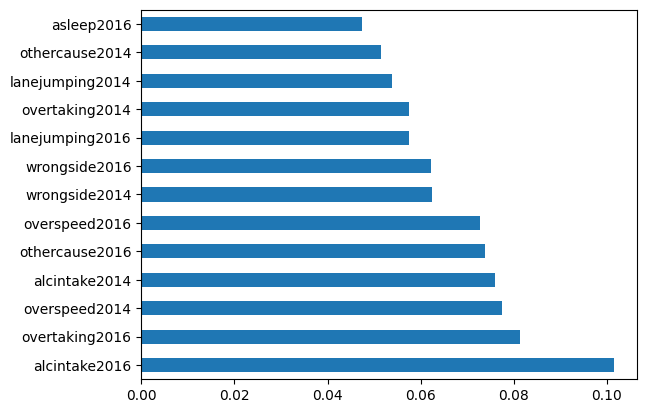

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [ ]:
df.corr()

,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
alcintake2014,1.000000,0.601144,0.585925,0.642087,0.666331,0.399190,0.073911,0.706948,0.606083,0.608631,0.481347,0.583152,0.500556,0.624619,0.619243,0.576996
overspeed2014,0.601144,1.000000,0.934741,0.851122,0.874243,0.584677,0.452638,0.826575,0.177289,0.940602,0.579934,0.751480,0.659645,0.712196,0.470092,0.627467
overtaking2014,0.585925,0.934741,1.000000,0.858874,0.900941,0.739233,0.459055,0.854963,0.248368,0.937523,0.690283,0.830417,0.777528,0.825788,0.555738,0.556456
lanejumping2014,0.642087,0.851122,0.858874,1.000000,0.902298,0.696446,0.491408,0.739393,0.374153,0.894095,0.677471,0.813756,0.727097,0.869651,0.606771,0.607855
wrongside2014,0.666331,0.874243,0.900941,0.902298,1.000000,0.754689,0.587273,0.799515,0.442385,0.949167,0.748038,0.880249,0.761404,0.871135,0.670321,0.637782
signalavoid2014,0.399190,0.584677,0.739233,0.696446,0.754689,1.000000,0.273121,0.642714,0.314826,0.722110,0.858043,0.776750,0.874143,0.864604,0.579584,0.534264
asleep2014,0.073911,0.452638,0.459055,0.491408,0.587273,0.273121,1.000000,0.111512,0.122036,0.556418,0.381914,0.393498,0.150526,0.345711,0.178261,0.082110
othercause2014,0.706948,0.826575,0.854963,0.739393,0.799515,0.642714,0.111512,1.000000,0.309857,0.823783,0.550338,0.739307,0.711739,0.736148,0.560124,0.716978
alcintake2016,0.606083,0.177289,0.248368,0.374153,0.442385,0.314826,0.122036,0.309857,1.000000,0.264380,0.513733,0.585352,0.446926,0.590996,0.826318,0.471038
overspeed2016,0.608631,0.940602,0.937523,0.894095,0.949167,0.722110,0.556418,0.823783,0.264380,1.000000,0.687983,0.800242,0.713003,0.818526,0.528009,0.581819


<Axes: >

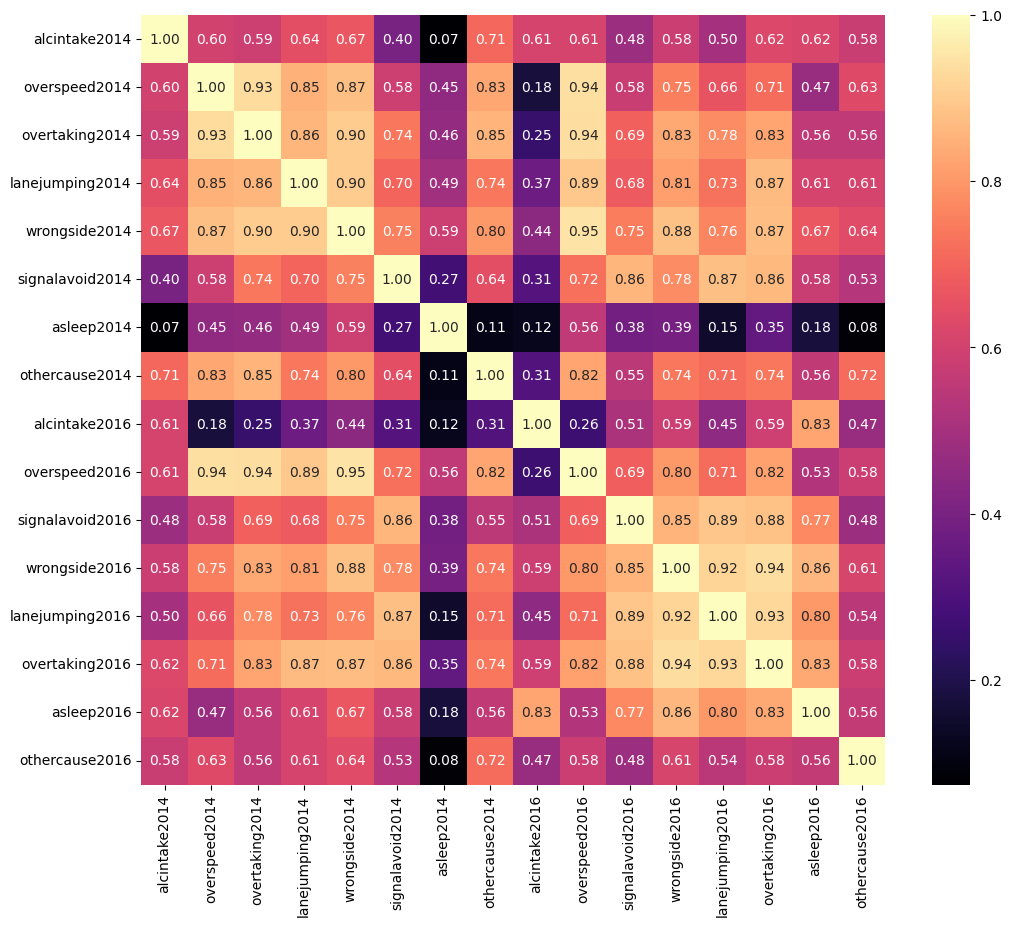

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

array([[<Axes: title={'center': 'alcintake2014'}>,
        <Axes: title={'center': 'overspeed2014'}>,
        <Axes: title={'center': 'overtaking2014'}>,
        <Axes: title={'center': 'lanejumping2014'}>],
       [<Axes: title={'center': 'wrongside2014'}>,
        <Axes: title={'center': 'signalavoid2014'}>,
        <Axes: title={'center': 'asleep2014'}>,
        <Axes: title={'center': 'othercause2014'}>],
       [<Axes: title={'center': 'alcintake2016'}>,
        <Axes: title={'center': 'overspeed2016'}>,
        <Axes: title={'center': 'signalavoid2016'}>,
        <Axes: title={'center': 'wrongside2016'}>],
       [<Axes: title={'center': 'lanejumping2016'}>,
        <Axes: title={'center': 'overtaking2016'}>,
        <Axes: title={'center': 'asleep2016'}>,
        <Axes: title={'center': 'othercause2016'}>]], dtype=object)

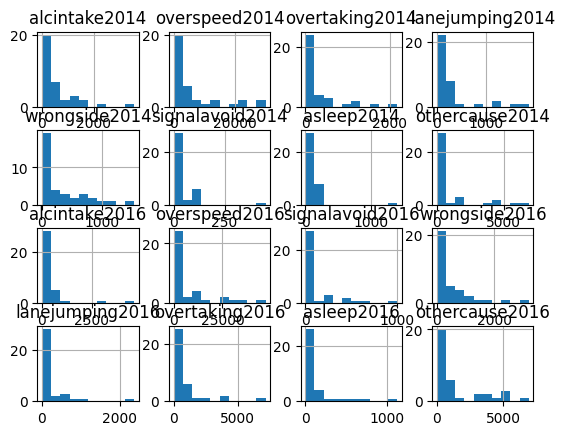

In [ ]:
df.hist()

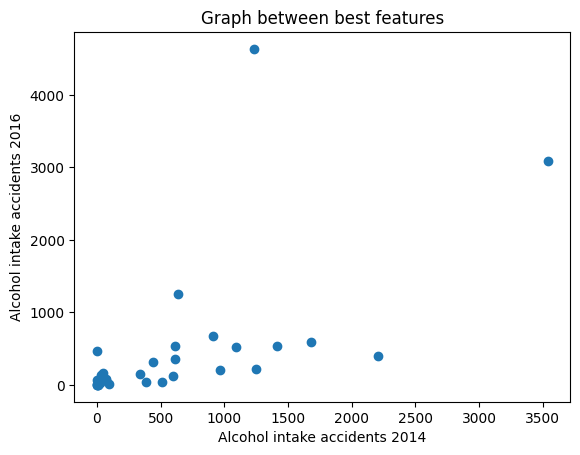

In [ ]:
x = df['alcintake2014']
y = df['alcintake2016']
plt.scatter(x, y)
plt.xlabel('Alcohol intake accidents 2014')
plt.ylabel('Alcohol intake accidents 2016')
plt.title('Graph between best features')
plt.show()


In [ ]:
X = df.iloc[:,0:16]
y = df.iloc[:,8]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['alcintake2016'], test_size=0.3, random_state=40)

In [ ]:
clfs = []
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)
print("Validation:",kfolds)

Validation: StratifiedKFold(n_splits=5, random_state=1, shuffle=True)


In [ ]:
# Normalisation
x_train=(x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train)).values
x_test=(x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test)).values

In [ ]:
#sample size
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (25, 16)
x_test: (11, 16)
y_train: (25,)
y_test: (11,)


In [ ]:
print(x_test)
print(y_test)

    alcintake2014  overspeed2014  overtaking2014  lanejumping2014  \
2        0.173164       0.218419        0.110730         0.068152   
26       0.143503       0.003485        0.012876         0.045216   
13       1.000000       1.000000        1.000000         1.000000   
16       0.007062       0.000907        0.000000         0.000000   
4        0.094633       0.319822        0.161373         0.205111   
5        0.002542       0.149289        0.028326         0.005242   
22       0.002260       0.000334        0.000000         0.000000   
32       0.000000       0.000000        0.001717         0.001311   
20       0.124859       0.106560        0.051502         0.138270   
30       0.003107       0.006636        0.071245         0.016383   
31       0.000282       0.000000        0.000000         0.000000   

    wrongside2014  signalavoid2014  asleep2014  othercause2014  alcintake2016  \
2        0.167382         0.080460    0.034884        0.152058       0.114175   
26       

In [ ]:
# Define the function to calculate the prior probability of each class -  Naive Bayes Algorithm
def calc_prior(y_train):
    classes, counts = np.unique(y_train, return_counts=True)
    prior = {}
    for i in range(len(classes)):
        prior[classes[i]] = counts[i] / len(y_train)
    return prior

# Define the function to calculate the conditional probability of each feature
def calc_conditional(x_train, y_train):
    n_features = x_train.shape[1]
    classes = np.unique(y_train)
    conditional = {}
    for cls in classes:
        idx = np.where(y_train == cls)
        x = x_train[idx]
        total_count = np.sum(x)
        conditional[cls] = {}
        for i in range(n_features):
            feature_count = np.sum(x[:,i])
            prob = (feature_count + 1) / (total_count + n_features)
            conditional[cls][i] = prob
    return conditional

# Define the function to make predictions
def predict(x_test, prior, conditional):
    y_pred = []
    for x in x_test:
        posterior = {}
        for cls in prior:
            likelihood = 1
            for i in range(len(x)):
                likelihood *= conditional[cls][i] ** x[i]
            posterior[cls] = likelihood * prior[cls]
        y_pred.append(max(posterior, key=posterior.get))
    return y_pred

# Generate some random training and testing data with 8 features
np.random.seed(42)
x_train = np.random.rand(100, 8)
y_train = np.random.randint(0, 2, 100)
x_test = np.random.rand(20, 8)
y_test = np.random.randint(0, 2, 20)

# Train the Naive Bayes model using the training data
prior = calc_prior(y_train)
conditional = calc_conditional(x_train, y_train)

# Make predictions on the testing data
y_pred = predict(x_test, prior, conditional)

# Calculate the accuracy of the model
correct = np.sum(y_pred == y_test)
total = len(y_test)
accuracy = correct / total
print("Accuracy:", accuracy*100, '%')


Accuracy: 55.00000000000001 %


[[11  0]
 [ 9  0]]


<ipython-input-233-27434e881f01>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-233-27434e881f01>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



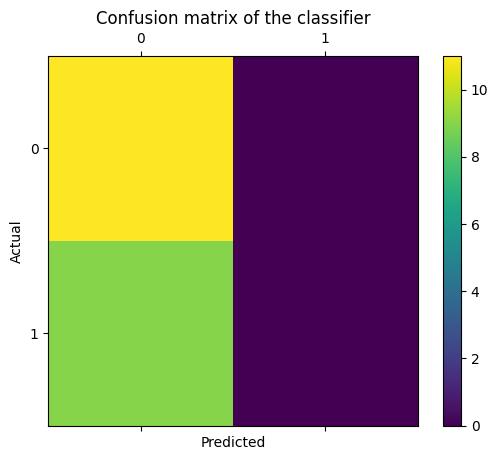

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_pred)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')

In [ ]:
classifierNB=MultinomialNB()
classifierNB.fit(x_train, y_train)
#clfs.append(classifierNB)
classifierNB.score(x_train,y_train)
# Predicting the Test set results
y_pred = classifierNB.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifierNB.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('\n')
print('Accuracy for test set for Naive Bayes = {}'
.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))




Accuracy for test set for Naive Bayes = 0.55


In [ ]:
#classification Report of traindata
print("Train Data",classification_report(y_pred_train, y_train))
#classification Report of testdata
print("Test Data",classification_report(y_test, y_pred))

Train Data               precision    recall  f1-score   support

           0       1.00      0.58      0.73       100
           1       0.00      0.00      0.00         0

    accuracy                           0.58       100
   macro avg       0.50      0.29      0.37       100
weighted avg       1.00      0.58      0.73       100

Test Data               precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

Text(0.5, 0, 'False Positive Rate')

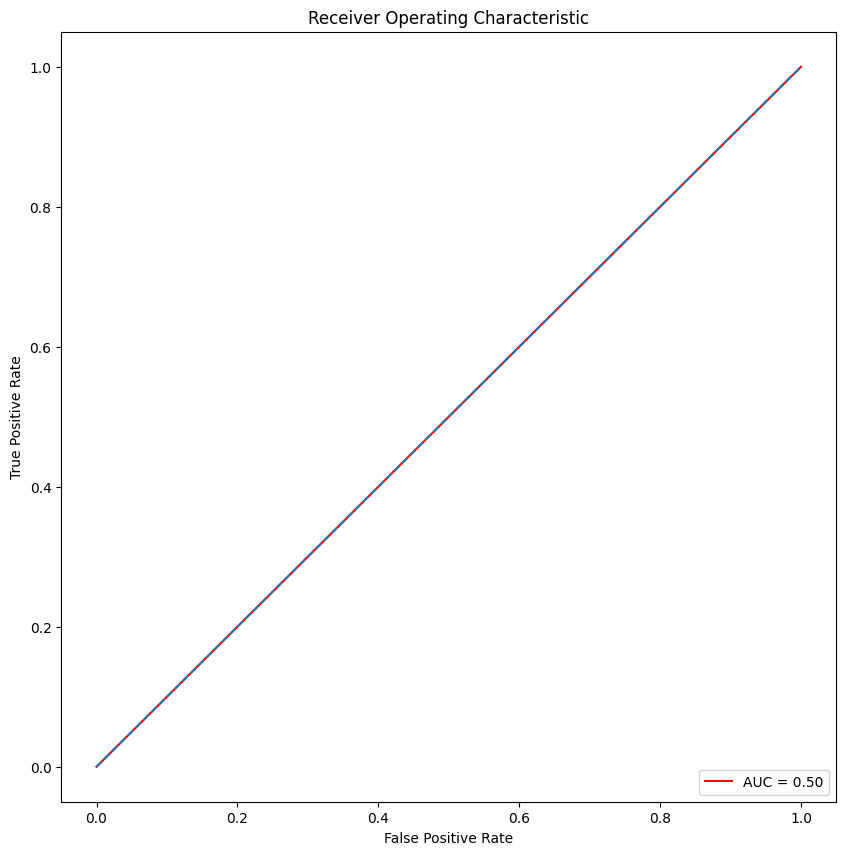

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
import numpy as np

class LogisticRegression:

    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold


In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict class labels and probabilities for testing set
y_pred = lr.predict(x_test)
y_prob = lr.predict_prob(x_test)

# Calculate accuracy score
accuracy = (y_pred == y_test).mean()
print("Accuracy score:", accuracy*100, '%')

Accuracy score: 45.0 %


In [ ]:
classifierLR=LogisticRegression()
classifierLR.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifierLR.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifierLR.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('\n')
print('Accuracy for test set for LogisticRegression = {}'
.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))




Accuracy for test set for LogisticRegression = 0.45


[[7 4]
 [7 2]]


<ipython-input-241-27434e881f01>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-241-27434e881f01>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



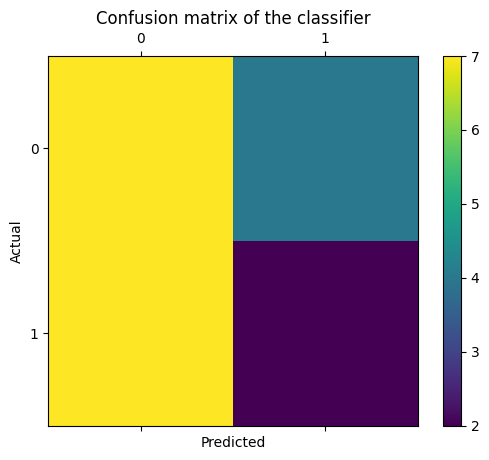

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_pred)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')

In [ ]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.33      0.22      0.27         9

    accuracy                           0.45        20
   macro avg       0.42      0.43      0.41        20
weighted avg       0.42      0.45      0.43        20



0.4292929292929293


Text(0.5, 0, 'False Positive Rate')

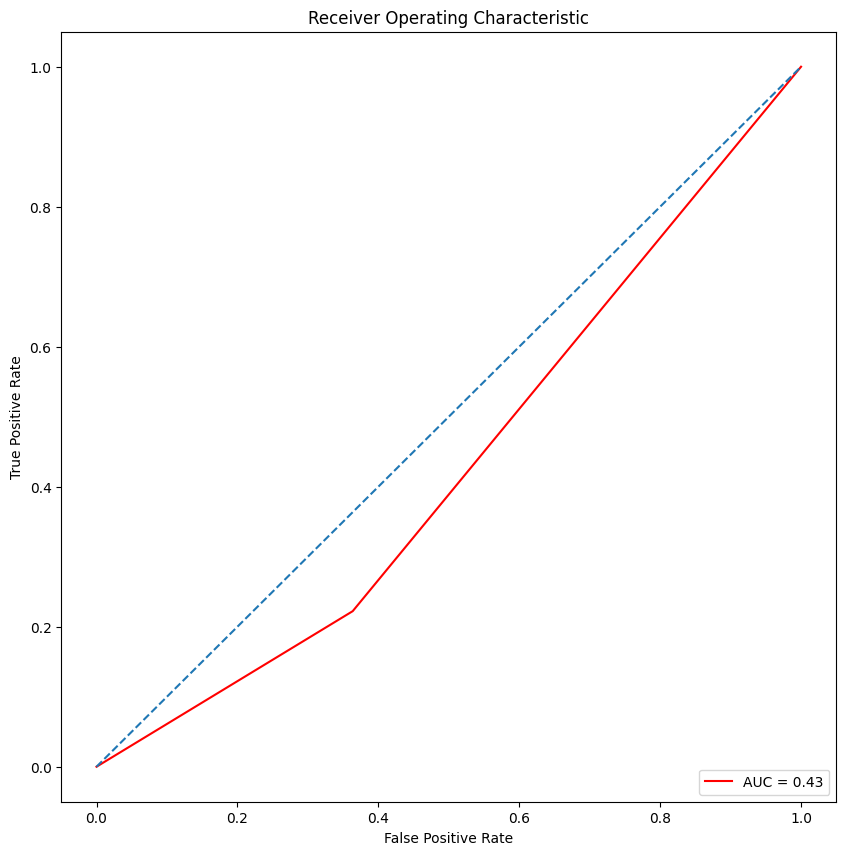

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
import math

# Define a class for the decision tree node
class DecisionTreeNode:
    def __init__(self, attribute=None, threshold=None, left=None, right=None, classification=None):
        self.attribute = attribute      # index of attribute to split on
        self.threshold = threshold      # threshold value to split on
        self.left = left                # left subtree
        self.right = right              # right subtree
        self.classification = classification  # classification label (for leaf nodes only)

# Define a function to calculate the entropy of a list of labels
def calculate_entropy(labels):
    label_counts = {}
    for label in labels:
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1
    entropy = 0.0
    for count in label_counts.values():
        probability = float(count) / len(labels)
        entropy -= probability * math.log(probability, 2)
    return entropy

# Define a function to split a dataset based on an attribute and threshold
def split_dataset(dataset, attribute, threshold):
    left_dataset = []
    right_dataset = []
    for sample in dataset:
        if sample[attribute] < threshold:
            left_dataset.append(sample)
        else:
            right_dataset.append(sample)
    return left_dataset, right_dataset

# Define a function to select the best attribute and threshold to split on
def select_best_split(dataset):
    best_attribute = None
    best_threshold = None
    best_entropy = float('inf')
    for attribute in range(len(dataset[0])-1):
        values = [sample[attribute] for sample in dataset]
        for threshold in values:
            left_dataset, right_dataset = split_dataset(dataset, attribute, threshold)
            if len(left_dataset) == 0 or len(right_dataset) == 0:
                continue
            entropy = (len(left_dataset) / len(dataset)) * calculate_entropy([sample[-1] for sample in left_dataset]) + \
                      (len(right_dataset) / len(dataset)) * calculate_entropy([sample[-1] for sample in right_dataset])
            if entropy < best_entropy:
                best_attribute = attribute
                best_threshold = threshold
                best_entropy = entropy
    return best_attribute, best_threshold

# Define a function to build a decision tree recursively
def build_decision_tree(dataset):
    labels = [sample[-1] for sample in dataset]
    if len(set(labels)) == 1:    # If all labels are the same, return a leaf node
        return DecisionTreeNode(classification=labels[0])
    if len(dataset[0]) == 1:    # If no more attributes to split on, return a leaf node with majority label
        majority_label = max(set(labels), key=labels.count)
        return DecisionTreeNode(classification=majority_label)
    best_attribute, best_threshold = select_best_split(dataset)
    left_dataset, right_dataset = split_dataset(dataset, best_attribute, best_threshold)
    left_subtree = build_decision_tree(left_dataset)
    right_subtree = build_decision_tree(right_dataset)
    return DecisionTreeNode(attribute=best_attribute, threshold=best_threshold, left=left_subtree, right=right_subtree)

# Define a function to make a prediction using a decision tree
def predict(node, sample):
    if node.classification is not None:
        return node.classification
    if sample[node.attribute] < node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)



In [ ]:
# assuming you have trained your model and made predictions on test data

# define a function to calculate accuracy
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

# calculate accuracy of predictions
acc = accuracy(y_test, y_pred)
print("Accuracy:", acc*100, '%')


Accuracy: 45.0 %


In [ ]:
classifierDT=DecisionTreeClassifier(criterion="entropy", max_depth=3)
classifierDT.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifierDT.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifierDT.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('\n')
print('Accuracy for test set for Decision Tree = {}'
.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))




Accuracy for test set for Decision Tree = 0.4


[[7 4]
 [8 1]]


<ipython-input-247-27434e881f01>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-247-27434e881f01>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



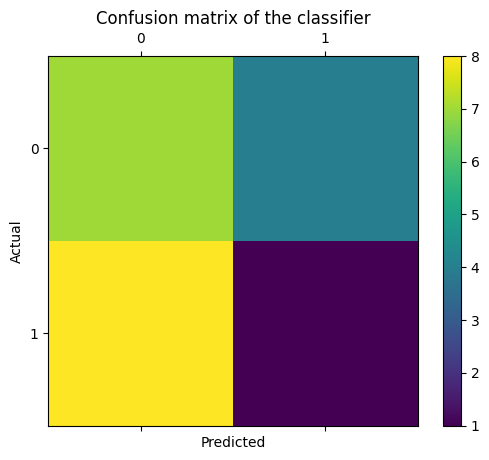

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_pred)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')

In [ ]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.64      0.54        11
           1       0.20      0.11      0.14         9

    accuracy                           0.40        20
   macro avg       0.33      0.37      0.34        20
weighted avg       0.35      0.40      0.36        20



0.37373737373737376


Text(0.5, 0, 'False Positive Rate')

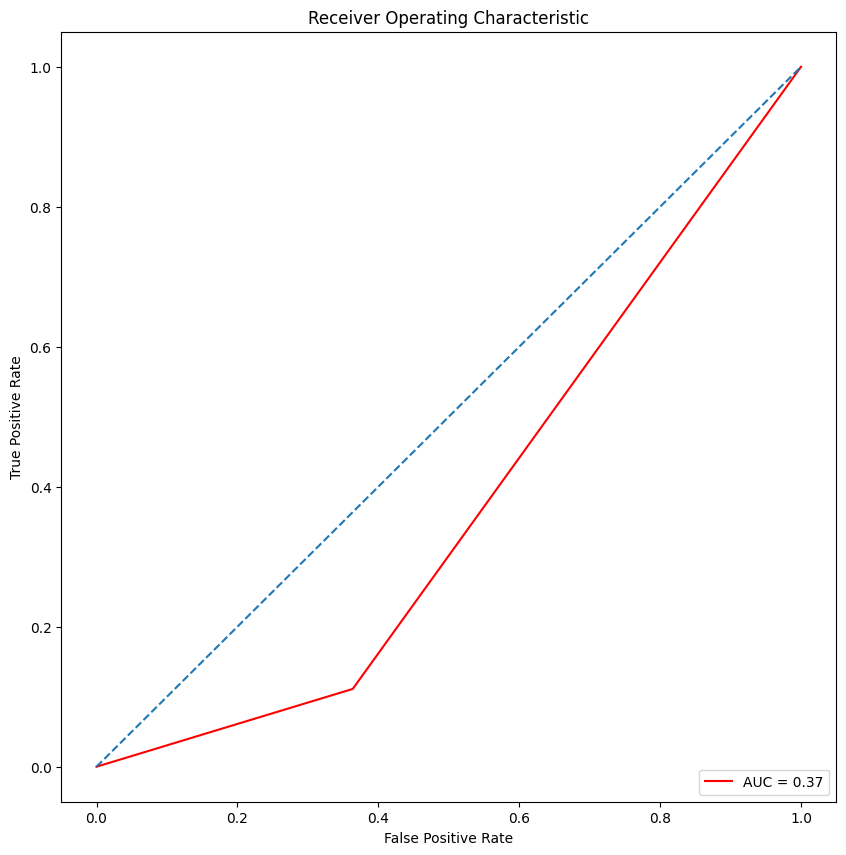

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

0.37373737373737376


Text(0.5, 0, 'False Positive Rate')

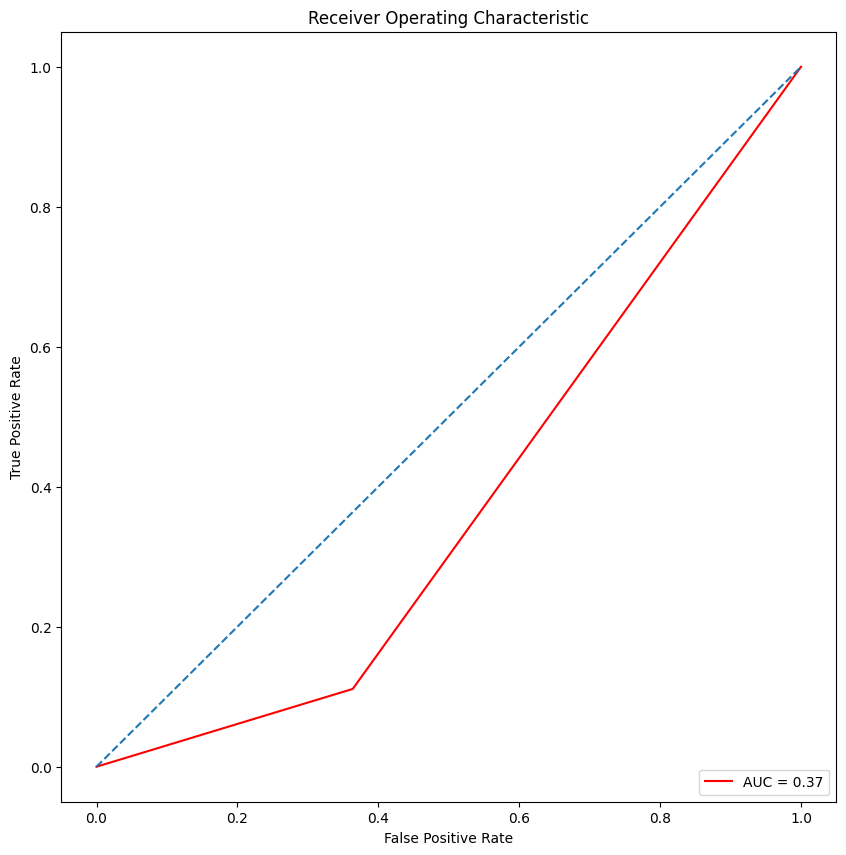

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
# SVM algorithm
def svm(train_data, train_labels, test_data):
    # Initialize weights and bias
    w = [0] * len(train_data[0])
    b = 0
    epochs = 100
    alpha = 0.1

    # Train the model
    for epoch in range(epochs):
        for i, x in enumerate(train_data):
            if (train_labels[i] * (np.dot(w, x) - b)) >= 1:
                # Correct classification
                dw = [0] * len(w)
            else:
                # Incorrect classification
                dw = [train_labels[i] * x[j] for j in range(len(x))]
            # Update weights
            w = [w[j] + alpha * (dw[j] - 2 * 0.01 * w[j]) for j in range(len(w))]

    # Make predictions on test data
    predictions = []
    for x in test_data:
        y = np.dot(w, x) - b
        if y >= 0:
            prediction = 1
        else:
            prediction = -1
        predictions.append(prediction)

    return predictions


In [ ]:
# assuming you have trained your model and made predictions on test data

# define a function to calculate accuracy
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

# calculate accuracy of predictions
acc = accuracy(y_test, y_pred)
print("Accuracy:", acc*100, '%')


Accuracy: 40.0 %


In [ ]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'rbf')
classifierSVM.fit(x_train, y_train)
pipeline_svm = make_pipeline(SVC(probability=True,
              kernel="linear", class_weight="balanced"))

classifierSVM = GridSearchCV( pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]},
                    cv = kfolds,
                    verbose=1,
                    n_jobs=-1)

classifierSVM .fit(x_train, y_train)
classifierSVM .score(x_test, y_test)
print(classifierSVM .score(x_test, y_test))
# Predicting the Test set results
y_pred = classifierSVM.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifierSVM.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('\n')
print('Accuracy for test set for svm = {}'
.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.55



Accuracy for test set for svm = 0.55


In [ ]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[[11  0]
 [ 9  0]]


<ipython-input-255-27434e881f01>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-255-27434e881f01>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



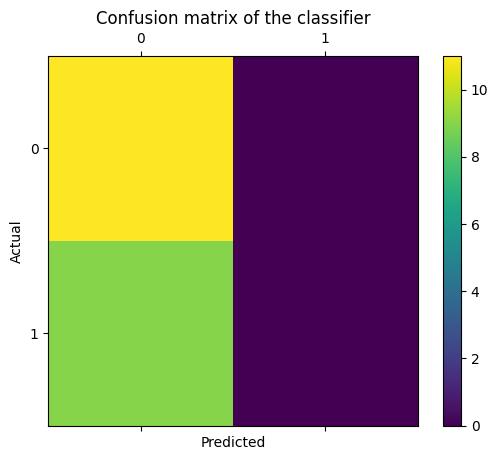

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_pred)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')

0.5


Text(0.5, 0, 'False Positive Rate')

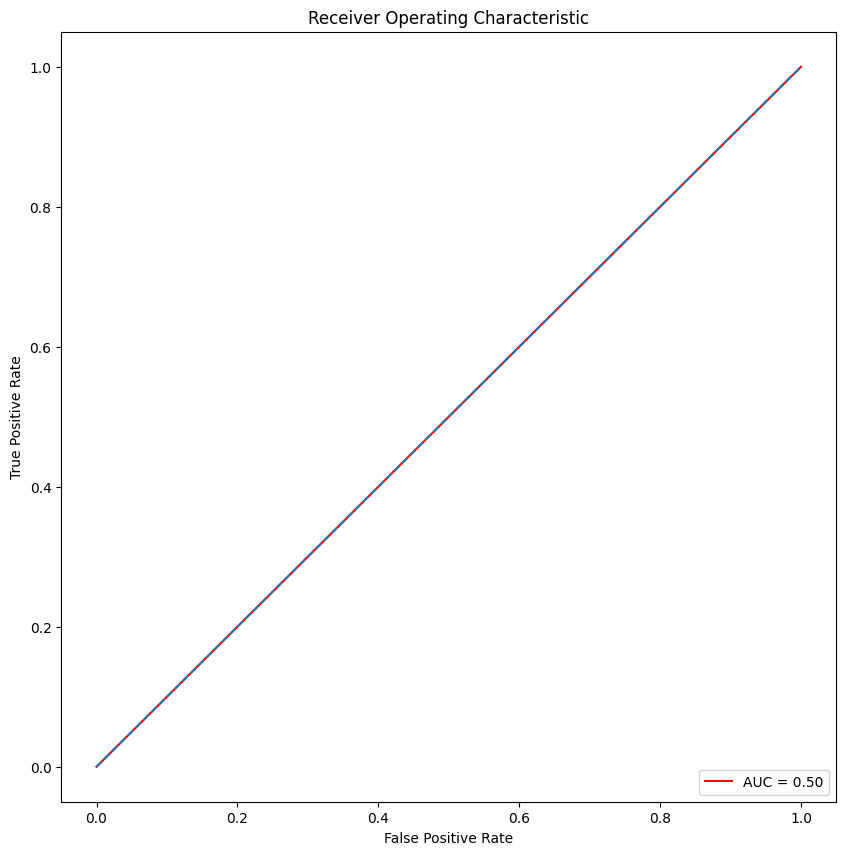

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly with mean 0
        self.weights1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.weights2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)

    def forward(self, X):
        # Forward propagation
        self.hidden = sigmoid(np.dot(X, self.weights1))
        self.output = sigmoid(np.dot(self.hidden, self.weights2))
        return self.output

    def backward(self, X, y, output):
        # Backward propagation
        d_output = (y - output) * sigmoid_derivative(output)
        d_hidden = np.dot(d_output, self.weights2.T) * sigmoid_derivative(self.hidden)
        self.weights2 += np.dot(self.hidden.T, d_output)
        self.weights1 += np.dot(X.T, d_hidden)

    def train(self, X, y, num_epochs):
        # Train neural network
        for epoch in range(num_epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        # Predict output for input X
        return self.forward(X)


# Define neural network model
input_size = 8
hidden_size = 3
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train neural network model
num_epochs = 10000
nn.train(x_train, y_train, num_epochs)

# Predict output for testing data
y_pred = nn.predict(X_test)

# Calculate accuracy
accuracy = np.mean(np.round(y_pred) == y_test)
print("Accuracy:", accuracy*100, '%')


ValueError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')